<a href="https://colab.research.google.com/github/srujanay18/SentiCook/blob/main/2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import necessary packages and read in the csv file
import os
import pandas as pd
import numpy as np
!pip install nltk

LOCAL_PATH = "/content/Recipe Reviews and User Feedback Dataset.csv"

df = pd.read_csv(LOCAL_PATH)
display(df.head())

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
#drop any rows with missing values
df_cleaned = df.dropna()
display(df_cleaned.head())

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
#show that there are no more missing values
display(df_cleaned.isnull().sum())

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [5]:
#drop all the unnecessary columns
columns_drop = ['recipe_code', 'comment_id', 'user_id', 'user_name', 'created_at', 'reply_count', 'best_score']
df_cleaned = df_cleaned.drop(columns=columns_drop)
display(df_cleaned.head())

,Unnamed: 0,recipe_number,recipe_name,user_reputation,thumbs_up,thumbs_down,stars,text
0,0,1,Creamy White Chili,1,0,0,5,"I tweaked it a little, removed onions because ..."
1,1,1,Creamy White Chili,50,7,0,5,Bush used to have a white chili bean and it ma...
2,2,1,Creamy White Chili,10,3,0,5,I have a very complicated white chicken chili ...
3,3,1,Creamy White Chili,1,2,0,0,"In your introduction, you mentioned cream chee..."
4,4,1,Creamy White Chili,10,7,0,0,Wonderful! I made this for a &#34;Chili/Stew&#...


In [6]:
!pip install -q vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [7]:
#VADER sentiment + binning/alignment on the CLEANED dataframe
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.stats import mannwhitneyu

analyzer = SentimentIntensityAnalyzer()

#sentiment scores on 'text' which is the actual comment
df_cleaned['vader_compound'] = df_cleaned['text'].astype(str).map(
    lambda t: analyzer.polarity_scores(t)['compound']
)

#VADER binning: positive ≥ 0.25; negative ≤ −0.25; neutral otherwise
def bin_vader(c):
    if c >= 0.25:
        return 'pos'
    elif c <= -0.25:
        return 'neg'
    else:
        return 'neu'

#star bins: positive ≥ 4; neutral == 3; negative ≤ 2
def bin_stars(s):
    try:
        s_int = int(s)
    except:
        return np.nan
    if s_int >= 4:
        return 'pos'
    elif s_int == 3:
        return 'neu'
    elif 0 <= s_int <= 2:
        return 'neg'
    else:
        return np.nan

df_cleaned['sentiment_bin'] = df_cleaned['vader_compound'].map(bin_vader)
df_cleaned['star_bin'] = df_cleaned['stars'].map(bin_stars)
df_cleaned = df_cleaned.dropna(subset=['star_bin']).reset_index(drop=True)

#sentiment versus star rating
ct = pd.crosstab(df_cleaned['sentiment_bin'], df_cleaned['star_bin'], normalize='index')
print("Sentiment vs Star bins (row-normalized):\n", ct)

#alignment of the vader sentiment of the text and the star bin
df_cleaned['aligned'] = (df_cleaned['sentiment_bin'] == df_cleaned['star_bin']).astype(int)

#aligned vs misaligned for upvotes, testing the hypothesis and generating a p-value
aligned_up = df_cleaned.loc[df_cleaned['aligned']==1, 'thumbs_up']
misaligned_up = df_cleaned.loc[df_cleaned['aligned']==0, 'thumbs_up']

if len(aligned_up) > 0 and len(misaligned_up) > 0:
    stat, p = mannwhitneyu(aligned_up, misaligned_up, alternative='two-sided')
    n1, n2 = len(aligned_up), len(misaligned_up)
    delta = 1 - (2*stat)/(n1*n2)
    print("\nUpvotes summary — aligned vs misaligned:")
    print(f" aligned  n={n1}, mean={aligned_up.mean():.3f}, median={aligned_up.median():.3f}")
    print(f" misalign n={n2}, mean={misaligned_up.mean():.3f}, median={misaligned_up.median():.3f}")
    print(f" Mann–Whitney U p={p:.3g}, Cliff’s delta={delta:.3f} (>|0.147|~med, >|0.33|~large)")
else:
    print("\nNot enough data for hypothesis test on upvotes (aligned vs misaligned).")


Sentiment vs Star bins (row-normalized):
 star_bin            neg       neu       pos
sentiment_bin                              
neg            0.476103  0.102941  0.420956
neu            0.310673  0.069886  0.619441
pos            0.090898  0.020172  0.888930

Upvotes summary — aligned vs misaligned:
 aligned  n=14647, mean=1.026, median=0.000
 misalign n=3533, mean=1.352, median=0.000
 Mann–Whitney U p=0.00483, Cliff’s delta=0.022 (>|0.147|~med, >|0.33|~large)


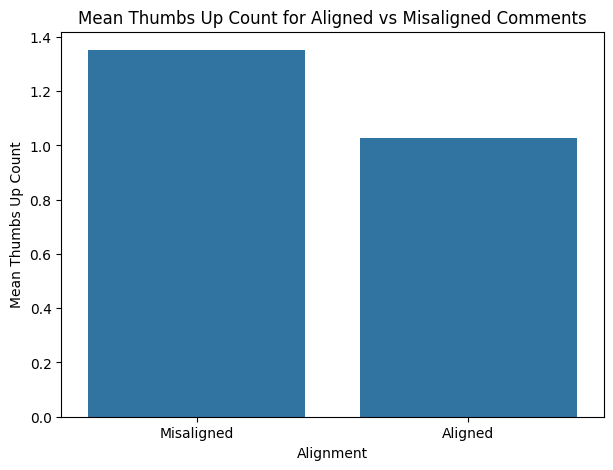

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#mean upvotes for aligned and misaligned comments
mean_upvotes = df_cleaned.groupby('aligned')['thumbs_up'].mean().reset_index()

mean_upvotes['aligned'] = mean_upvotes['aligned'].map({0: 'Misaligned', 1: 'Aligned'})

#bar plot of the mean upvotes
plt.figure(figsize=(7, 5))
sns.barplot(x='aligned', y='thumbs_up', data=mean_upvotes)
plt.xlabel('Alignment')
plt.ylabel('Mean Thumbs Up Count')
plt.title('Mean Thumbs Up Count for Aligned vs Misaligned Comments')
plt.show()

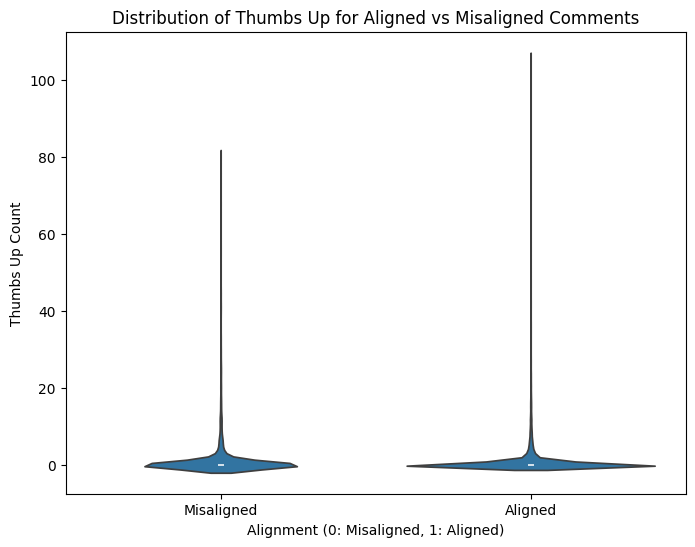

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#distribution of thumbs_up for aligned vs misaligned comments
plt.figure(figsize=(8, 6))
sns.violinplot(x='aligned', y='thumbs_up', data=df_cleaned)
plt.xlabel('Alignment (0: Misaligned, 1: Aligned)')
plt.ylabel('Thumbs Up Count')
plt.title('Distribution of Thumbs Up for Aligned vs Misaligned Comments')
plt.xticks([0, 1], ['Misaligned', 'Aligned'])
plt.show()

In [16]:
import pandas as pd

#summary statistics for thumbs_up by alignment
upvote_summary = df_cleaned.groupby('aligned')['thumbs_up'].agg(['count', 'mean', 'median', 'min', 'max'])

upvote_summary = upvote_summary.rename(index={0: 'Misaligned', 1: 'Aligned'})

print("Summary of Thumbs Up for Aligned vs Misaligned Comments:")
display(upvote_summary)

Summary of Thumbs Up for Aligned vs Misaligned Comments:


,count,mean,median,min,max
aligned,,,,,
Misaligned,3533,1.351543,0.0,0,80
Aligned,14647,1.026149,0.0,0,106


In [8]:
#train test split with the supervised model
from sklearn.model_selection import train_test_split

X = df_cleaned[['sentiment_bin']]  # features (sentiment bin)
y = df_cleaned['star_bin']         # target (star rating bin)

#one-hot encoding categorical predictor
X = pd.get_dummies(X, columns=['sentiment_bin'], drop_first=True)

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14544, 2)
Shape of X_test: (3636, 2)
Shape of y_train: (14544,)
Shape of y_test: (3636,)


In [9]:
#train the model
from sklearn.linear_model import LogisticRegression

#logistic regression model
model = LogisticRegression()

#train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Accuracy: 0.8482

Confusion Matrix:


array([[  39,    0,  403],
       [   8,    0,   90],
       [  51,    0, 3045]])

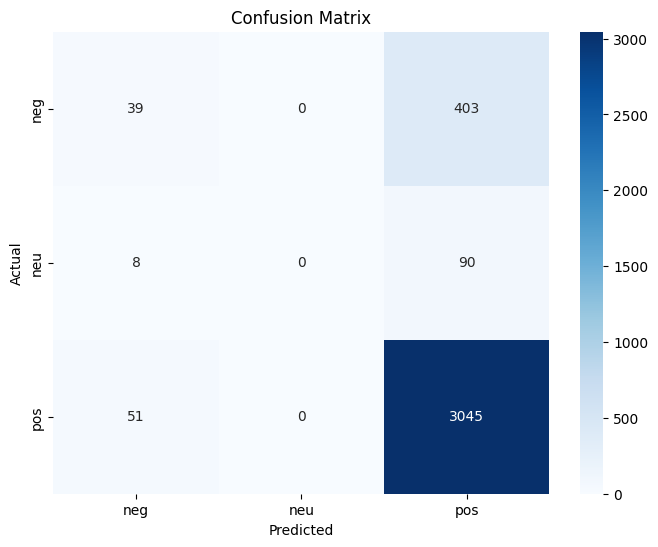


Classification Report:
              precision    recall  f1-score   support

         neg       0.40      0.09      0.14       442
         neu       0.00      0.00      0.00        98
         pos       0.86      0.98      0.92      3096

    accuracy                           0.85      3636
   macro avg       0.42      0.36      0.35      3636
weighted avg       0.78      0.85      0.80      3636



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


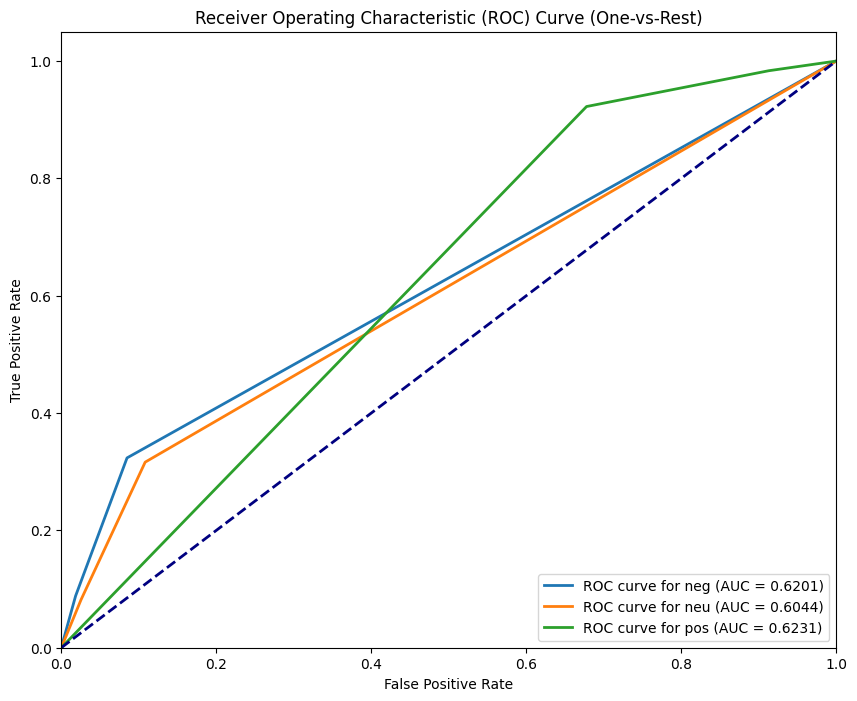

In [10]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Predict on the test data
y_pred = model.predict(X_test)

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
display(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Print Classification Report (includes precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#Get probability estimates for each class
y_prob = model.predict_proba(X_test)

#Get the class labels
classes = model.classes_


plt.figure(figsize=(10, 8))

#Plot ROC curve for each class
for i in range(len(classes)):
    class_name = classes[i]

    y_test_class = (y_test == class_name).astype(int)


    y_prob_class = y_prob[:, i]

    #Calculate ROC curve and AUC for the current class
    fpr, tpr, thresholds = roc_curve(y_test_class, y_prob_class)
    roc_auc = auc(fpr, tpr) # Use the calculated AUC

    #Plot the ROC curve using the calculated AUC value in the label
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {class_name} (AUC = {roc_auc:.4f})') # Use roc_auc

#Plot the random guess line, which shows if the model were just random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

In [12]:
#The model was pretty bad at predicting the neutral class, so we changed some of the class weighting
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

#class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("Computed Class Weights:", class_weight_dict)

#logistic regression model with class weights
model_weighted = LogisticRegression(class_weight=class_weight_dict, random_state=42)

#train the model using the training data
model_weighted.fit(X_train, y_train)

print("\nWeighted Model training complete.")

Computed Class Weights: {'neg': np.float64(2.7451868629671576), 'neu': np.float64(12.36734693877551), 'pos': np.float64(0.39140965606329725)}

Weighted Model training complete.


Accuracy (Weighted Model): 0.8025

Confusion Matrix (Weighted Model):


array([[  39,  104,  299],
       [   8,   23,   67],
       [  51,  189, 2856]])

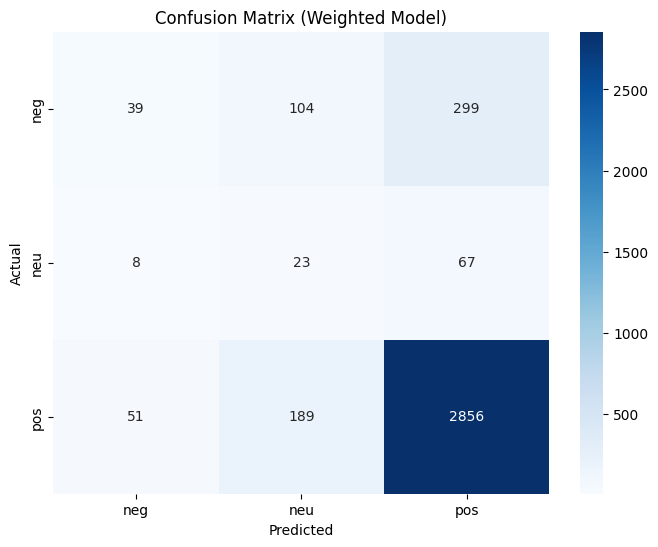


Classification Report (Weighted Model):
              precision    recall  f1-score   support

         neg       0.40      0.09      0.14       442
         neu       0.07      0.23      0.11        98
         pos       0.89      0.92      0.90      3096

    accuracy                           0.80      3636
   macro avg       0.45      0.42      0.39      3636
weighted avg       0.81      0.80      0.79      3636


AUC values for each class (Weighted Model - One-vs-Rest):
  neg: 0.6201
  neu: 0.6044
  pos: 0.6231


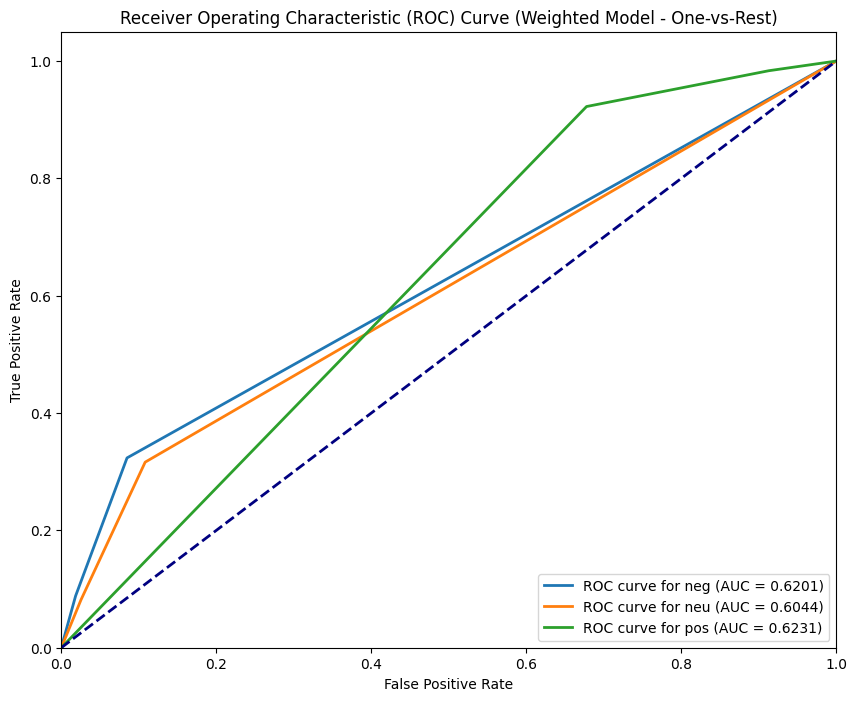

In [13]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#predict on the test data
y_pred_weighted = model_weighted.predict(X_test)

#calculate accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy (Weighted Model): {accuracy_weighted:.4f}")

#Confusion Matrix with weighted classes
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
print("\nConfusion Matrix (Weighted Model):")
display(conf_matrix_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=model_weighted.classes_, yticklabels=model_weighted.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Weighted Model)')
plt.show()

#classification report (precision, recall, f1-score)
print("\nClassification Report (Weighted Model):")
print(classification_report(y_test, y_pred_weighted))

#probability estimates for each class
y_prob_weighted = model_weighted.predict_proba(X_test)

#class labels
classes_weighted = model_weighted.classes_

#AUC values for each class
print("\nAUC values for each class (Weighted Model - One-vs-Rest):")
auc_values_weighted = {}
plt.figure(figsize=(10, 8))

#ROC curve for each class
for i in range(len(classes_weighted)):
    class_name = classes_weighted[i]
    y_test_class_weighted = (y_test == class_name).astype(int)

    y_prob_class_weighted = y_prob_weighted[:, i]

    #ROC curve
    fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test_class_weighted, y_prob_class_weighted)

    #AUC
    roc_auc_weighted = auc(fpr_weighted, tpr_weighted)
    auc_values_weighted[class_name] = roc_auc_weighted
    print(f"  {class_name}: {roc_auc_weighted:.4f}")

    #plot the ROC curve
    plt.plot(fpr_weighted, tpr_weighted, lw=2, label=f'ROC curve for {class_name} (AUC = {roc_auc_weighted:.4f})')


#plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Weighted Model - One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

The following code is a model that looks at if upvotes can be used to predict sentiment alignment!

In [18]:
X = df_cleaned[['thumbs_up']]
y = df_cleaned['aligned']

In [19]:
from sklearn.model_selection import train_test_split

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14544, 1)
Shape of X_test: (3636, 1)
Shape of y_train: (14544,)
Shape of y_test: (3636,)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Accuracy: 0.8056

Confusion Matrix:


array([[   0,  707],
       [   0, 2929]])

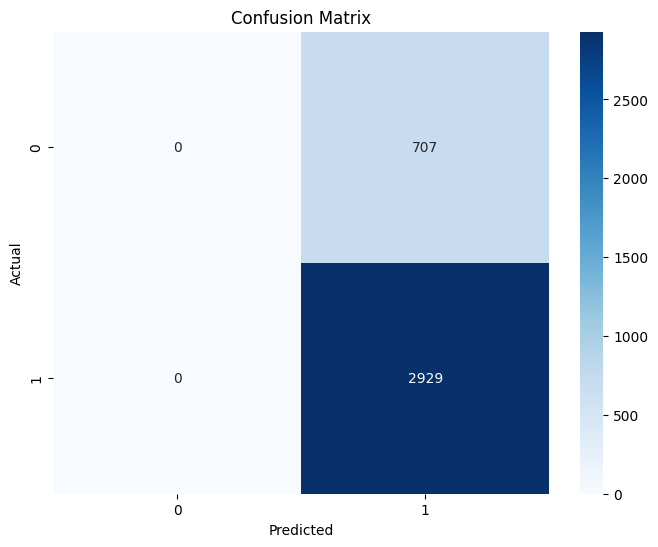


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       707
           1       0.81      1.00      0.89      2929

    accuracy                           0.81      3636
   macro avg       0.40      0.50      0.45      3636
weighted avg       0.65      0.81      0.72      3636



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


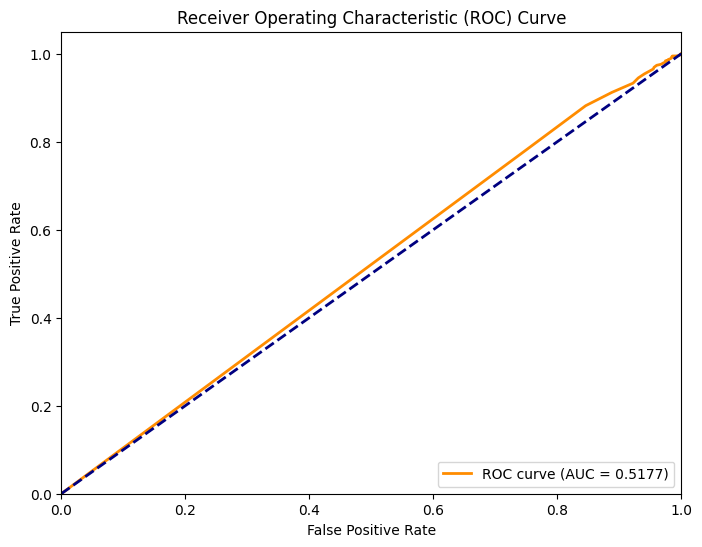

In [26]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#predict on the test data
y_pred = model.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
display(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

if len(model.classes_) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
